# Ordination and Dimensionality Reduction
Multidimensional scaling is an ordination method suited for 0-inflated data like microbiome OTU abundances that reveal proportionate abundance of taxonomic bacterial groups in a sample. To compare 3 methods, let's use the scikit MDS, NMDS and PCA analysis functions. We will then plot the outcome as a scatterplot annotated by sample type.

**Here are some datasets to try:**

Microbiome dataset 1: Gut microbiome from Chow (Normal) vs HFD (High Fat Diet) mice from the publication: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4297748/

dataset 2: acne vs. perioral dermatitis vs. control skin microbiome: https://www.ncbi.nlm.nih.gov/bioproject/PRJNA636582

File2:
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/skin_microbiome_Abundance_table_marked1.txt

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#load data
df = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/skin_microbiome_Abundance_table_marked1.txt',sep='\t',header=(0)) 

In [ ]:
df.shape

df.describe

<bound method NDFrame.describe of             id SRR11961372 SRR11961374  ... SRR11961457 SRR11961458 SRR11961459
0        Group        none  adult acne  ...        none        none        none
1        OTU_1       11432      150251  ...        5306        3345        6662
2        OTU_2           0       17275  ...           0           0           0
3        OTU_3           0        1300  ...           0           0           0
4        OTU_4        3823        6145  ...         335        2614        1640
...        ...         ...         ...  ...         ...         ...         ...
2356  OTU_2356           0           0  ...           0           0           0
2357  OTU_2357           0           0  ...           0           0           0
2358  OTU_2358           0           0  ...           0           0           0
2359  OTU_2359           0           0  ...           0           0           0
2360  OTU_2360           0           0  ...           1           0           0

[2361

In [ ]:
#set labels
labels_list = df.loc[[0]] 

#Make a list of sample names
sample_names = df.loc[0] 
sample_names = list(df)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Remove row "Group" at index 0 from data
data=df.drop([0]) 

#Remove id from axis
data=data.drop(['id'], axis=1) 
data = data.transpose() 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

In [ ]:
labels

array(['adult acne', 'none', 'perioral dermatitis'], dtype=object)

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler 
from sklearn import manifold

scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data) 

#import libraries for ploting and scaling
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

#MDS
mds = MDS(2,random_state=0)
XMDS = mds.fit_transform(scaled_data)

#NMDS
nmds = manifold.MDS(n_components=2, random_state=0, metric=False, max_iter=3000)
XNMDS = nmds.fit_transform(scaled_data)

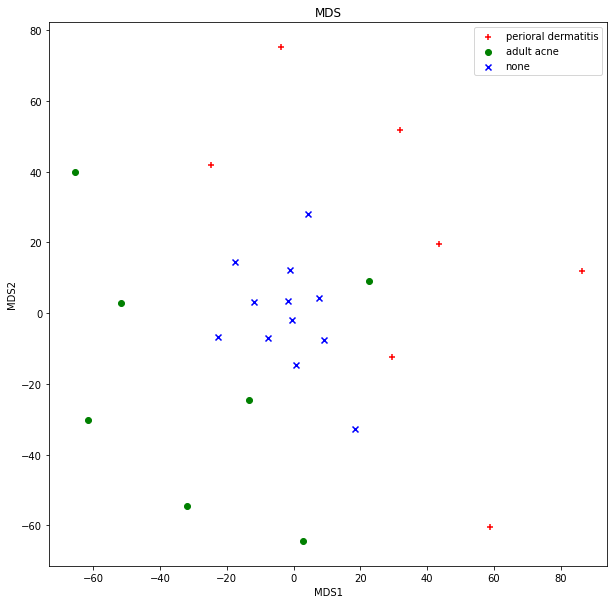

In [ ]:
# plot MDS

MDS1 = 0 
MDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XMDS.shape[0]): 
  if flabels[i] == 'perioral dermatitis': 
    c1 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='r', marker='+') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 
  elif flabels[i] == 'adult acne': 
    c2 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='g', marker='o') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 
  elif flabels[i] == 'none': 
    c3 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='b', marker='x') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 

#Add labels to MDS scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none']) 

plt.xlabel('MDS1') 
plt.ylabel('MDS2') 
plt.title('MDS')
plt.show() 

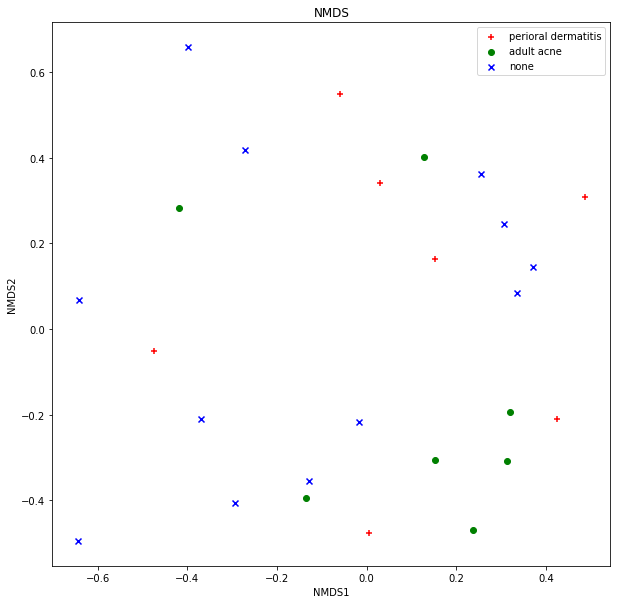

In [ ]:
#NMDS
NMDS1 = 0 
NMDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XNMDS.shape[0]): 
  if flabels[i] == 'perioral dermatitis': 
    c1 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='r', marker='+') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 
  elif flabels[i] == 'adult acne': 
    c2 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='g', marker='o') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 
  elif flabels[i] == 'none': 
    c3 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='b', marker='x') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none']) 
plt.xlabel('NMDS1') 
plt.ylabel('NMDS2') 
plt.title('NMDS')
plt.show() 

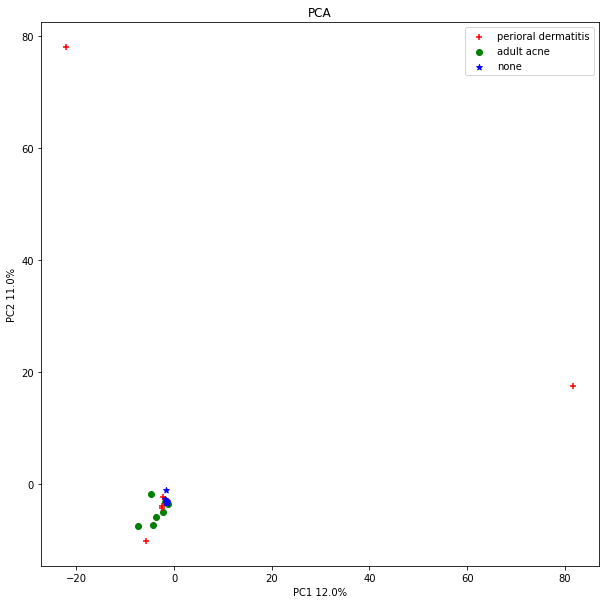

In [ ]:
#Run Principal Component Analysis
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'perioral dermatitis': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'adult acne': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'none': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('PCA')
plt.show() 

Assignment:

compare PCA with and without scaling to tSNE and MDS using 2 datasets - a low dimensional one and a high dimensional one

tSNE notebook: https://colab.research.google.com/drive/1QBLoCrMVoAWuNb5fXOLRrEGDIO096w6r?usp=sharing


